<a href="https://colab.research.google.com/github/iamnileshmehta/Machine-Learning-Projects/blob/main/Forecast_Cab_Booking_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Import the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**2. Load test and train datasets**

In [ ]:
data_train= pd.read_csv('/content/train.csv')
data_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,05-02-2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,09-05-2012 04:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
5,8/17/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791
6,10-06-2012 09:00,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,395
7,09-10-2012 04:00,Fall,0,1,Clear + Few clouds,21.32,25.000,68,19.0012,5
8,7/14/2012 4:00,Fall,0,0,"Light Snow, Light Rain",27.06,31.060,61,7.0015,9
9,02-06-2011 18:00,Spring,0,0,Clear + Few clouds,12.30,15.150,56,11.0014,78


In [ ]:
data_test= pd.read_csv('/content/test.csv')
data_test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994
5,4/1/2011 23:00,Summer,0,1,Clear + Few clouds,12.30,15.910,61,6.0032
6,5/15/2011 18:00,Summer,0,0,Clear + Few clouds,22.96,26.515,78,16.9979
7,11/1/2012 18:00,Winter,0,1,Mist + Cloudy,16.40,20.455,50,11.0014
8,10/12/2012 16:00,Winter,0,1,Clear + Few clouds,18.86,22.725,41,23.9994
9,3/18/2011 3:00,Spring,0,1,Clear + Few clouds,14.76,17.425,71,12.9980


In [ ]:
data_train.shape

(8708, 10)

- We have 8708 rows of training data, and different types of data types are available in dataset.


In [ ]:
data_test.shape

(2178, 9)

In [ ]:
data_train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

In [ ]:
data_test.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [ ]:
data_train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [ ]:
data_test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

- There are no null value found in both datasets.

In [ ]:
data_train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


##**Data extracted from datetime column to new columns**

In [ ]:
data_train['datetime'] = pd.to_datetime(data_train['datetime'])

data_train['date']= data_train['datetime'].dt.day
data_train['hour']= data_train['datetime'].dt.hour
data_train['weekDay'] = data_train['datetime'].dt.day_name()
data_train['month'] = data_train['datetime'].dt.month_name()
data_train['year'] = data_train['datetime'].dt.year

data_train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekDay,month,year
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2,19,Wednesday,May,2012
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,5,4,Wednesday,September,2012
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,13,9,Thursday,January,2011
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,18,16,Friday,November,2011
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,13,13,Tuesday,September,2011


In [ ]:
data_test['datetime'] = pd.to_datetime(data_test['datetime'])

data_test['date']= data_test['datetime'].dt.day
data_test['hour']= data_test['datetime'].dt.hour
data_test['weekDay'] = data_test['datetime'].dt.day_name()
data_test['month'] = data_test['datetime'].dt.month_name()
data_test['year'] = data_test['datetime'].dt.year

data_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekDay,month,year
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,10,11,Thursday,May,2012
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,9,7,Saturday,June,2012
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,6,20,Sunday,March,2011
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,13,11,Thursday,October,2011
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,2,12,Saturday,June,2012


##**Convert the datatype of following columns:**

In [ ]:
data_train['season'] = data_train['season'].astype('category')
data_train['holiday'] = data_train['holiday'].astype('category')
data_train['workingday'] = data_train['workingday'].astype('category')
data_train['weather'] = data_train['weather'].astype('category')
data_train['weekDay'] = data_train['weekDay'].astype('category')

data_train.dtypes

datetime         datetime64[ns]
season                 category
holiday                category
workingday             category
weather                category
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
date                      int64
hour                      int64
weekDay                category
month                    object
year                      int64
dtype: object

In [ ]:
data_test['season'] = data_test['season'].astype('category')
data_test['holiday'] = data_test['holiday'].astype('category')
data_test['workingday'] = data_test['workingday'].astype('category')
data_test['weather'] = data_test['weather'].astype('category')
data_test['weekDay'] = data_test['weekDay'].astype('category')

data_test.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
date                   int64
hour                   int64
weekDay             category
month                 object
year                   int64
dtype: object

- data from some columns has been converted to categorical values in both datasets.

##**Drop datetime column as data already extracted:**

In [ ]:
data_train= data_train.drop('datetime', axis=1)
data_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekDay,month,year
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2,19,Wednesday,May,2012
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,5,4,Wednesday,September,2012
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,13,9,Thursday,January,2011
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,18,16,Friday,November,2011
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,13,13,Tuesday,September,2011


In [ ]:
data_test = data_test.drop('datetime', axis=1)
data_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekDay,month,year
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,10,11,Thursday,May,2012
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,9,7,Saturday,June,2012
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,6,20,Sunday,March,2011
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,13,11,Thursday,October,2011
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,2,12,Saturday,June,2012


##**Perform outlier analysis:**

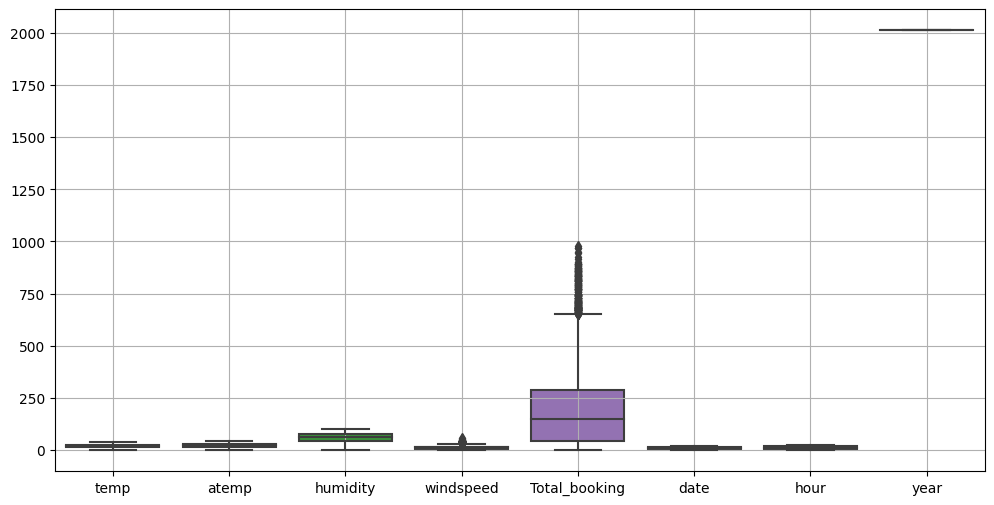

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data_train)
plt.grid()

- From the above chart we can see that the outliers are available in Total_booking and windspeed columns, so we need to remove those outliers for better accuracy.

In [ ]:
q1_booking = data_train['Total_booking'].quantile(0.25)
q3_booking = data_train['Total_booking'].quantile(0.75)

iqr_total_booking = q3_booking - q1_booking
print(iqr_total_booking)

lower_bound = q1_booking - 1.5* iqr_total_booking
upper_bound = q3_booking + 1.5* iqr_total_booking

data_train = data_train[(data_train['Total_booking']>=lower_bound) & (data_train['Total_booking']<= upper_bound)]


243.0


In [ ]:
data_train['windspeed'] = np.array(data_train['windspeed'])

clip_min = 0
clip_max = 30
data_train['windspeed'] = np.clip(data_train['windspeed'], clip_min, clip_max)

<ipython-input-19-553cd6f8d43f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['windspeed'] = np.array(data_train['windspeed'])
<ipython-input-19-553cd6f8d43f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['windspeed'] = np.clip(data_train['windspeed'], clip_min, clip_max)


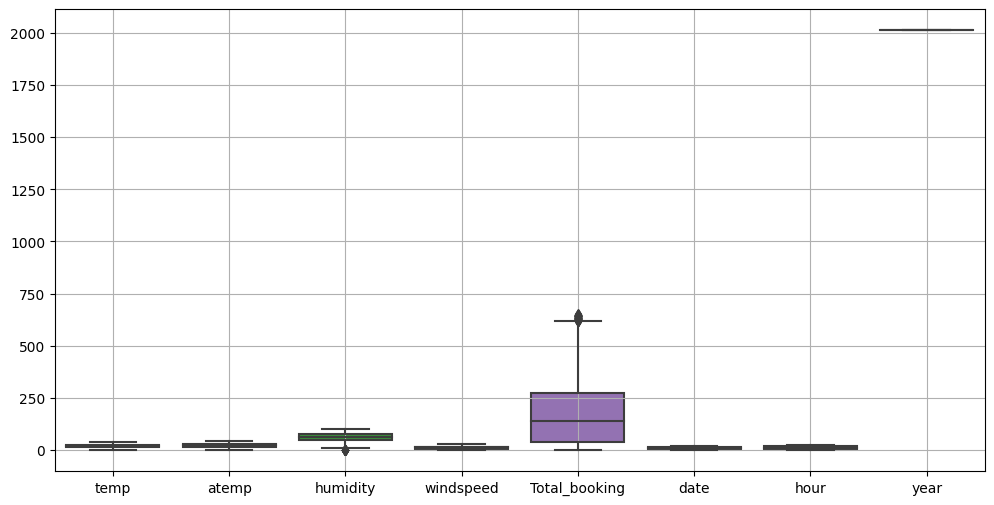

In [ ]:
plt.figure(figsize= (12,6))
sns.boxplot(data_train)
plt.grid()
plt.show()

##**Perform Correlation analysis:**

<Axes: >

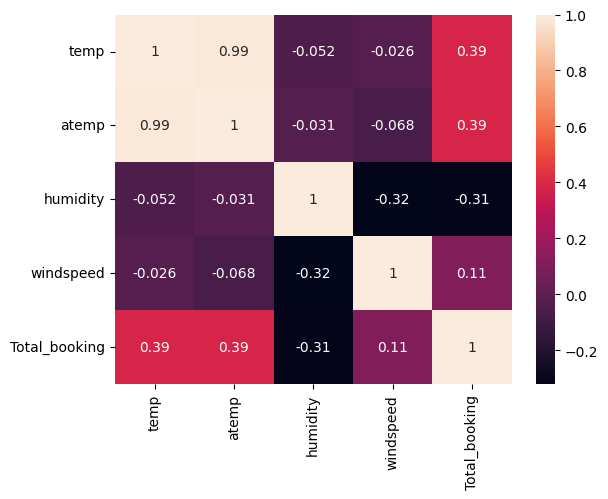

In [ ]:
columns= ['temp', 'atemp', 'humidity', 'windspeed', 'Total_booking']
sns.heatmap(data_train[columns].corr(), annot=True)

- As we can see on above chart, temp and atemp data are highly correlated. Both columns create similar impact on Total_booking, so we can remove one column from temp and atemp.

In [ ]:
data_train.drop(columns=['atemp'], inplace=True)
data_test.drop(columns=['atemp'], inplace=True)

##**Perform Visualization:**

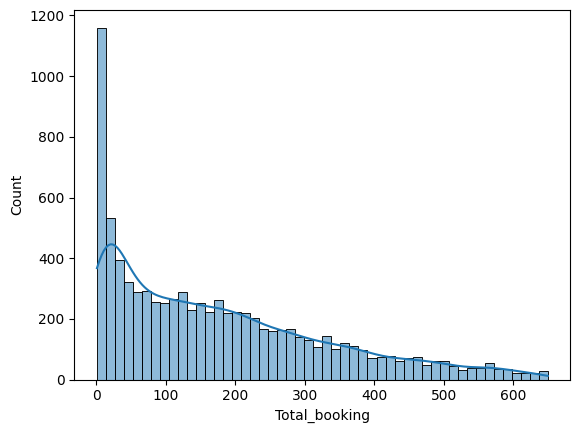

In [ ]:
sns.histplot(data_train['Total_booking'], kde=True, bins=50)
plt.show()

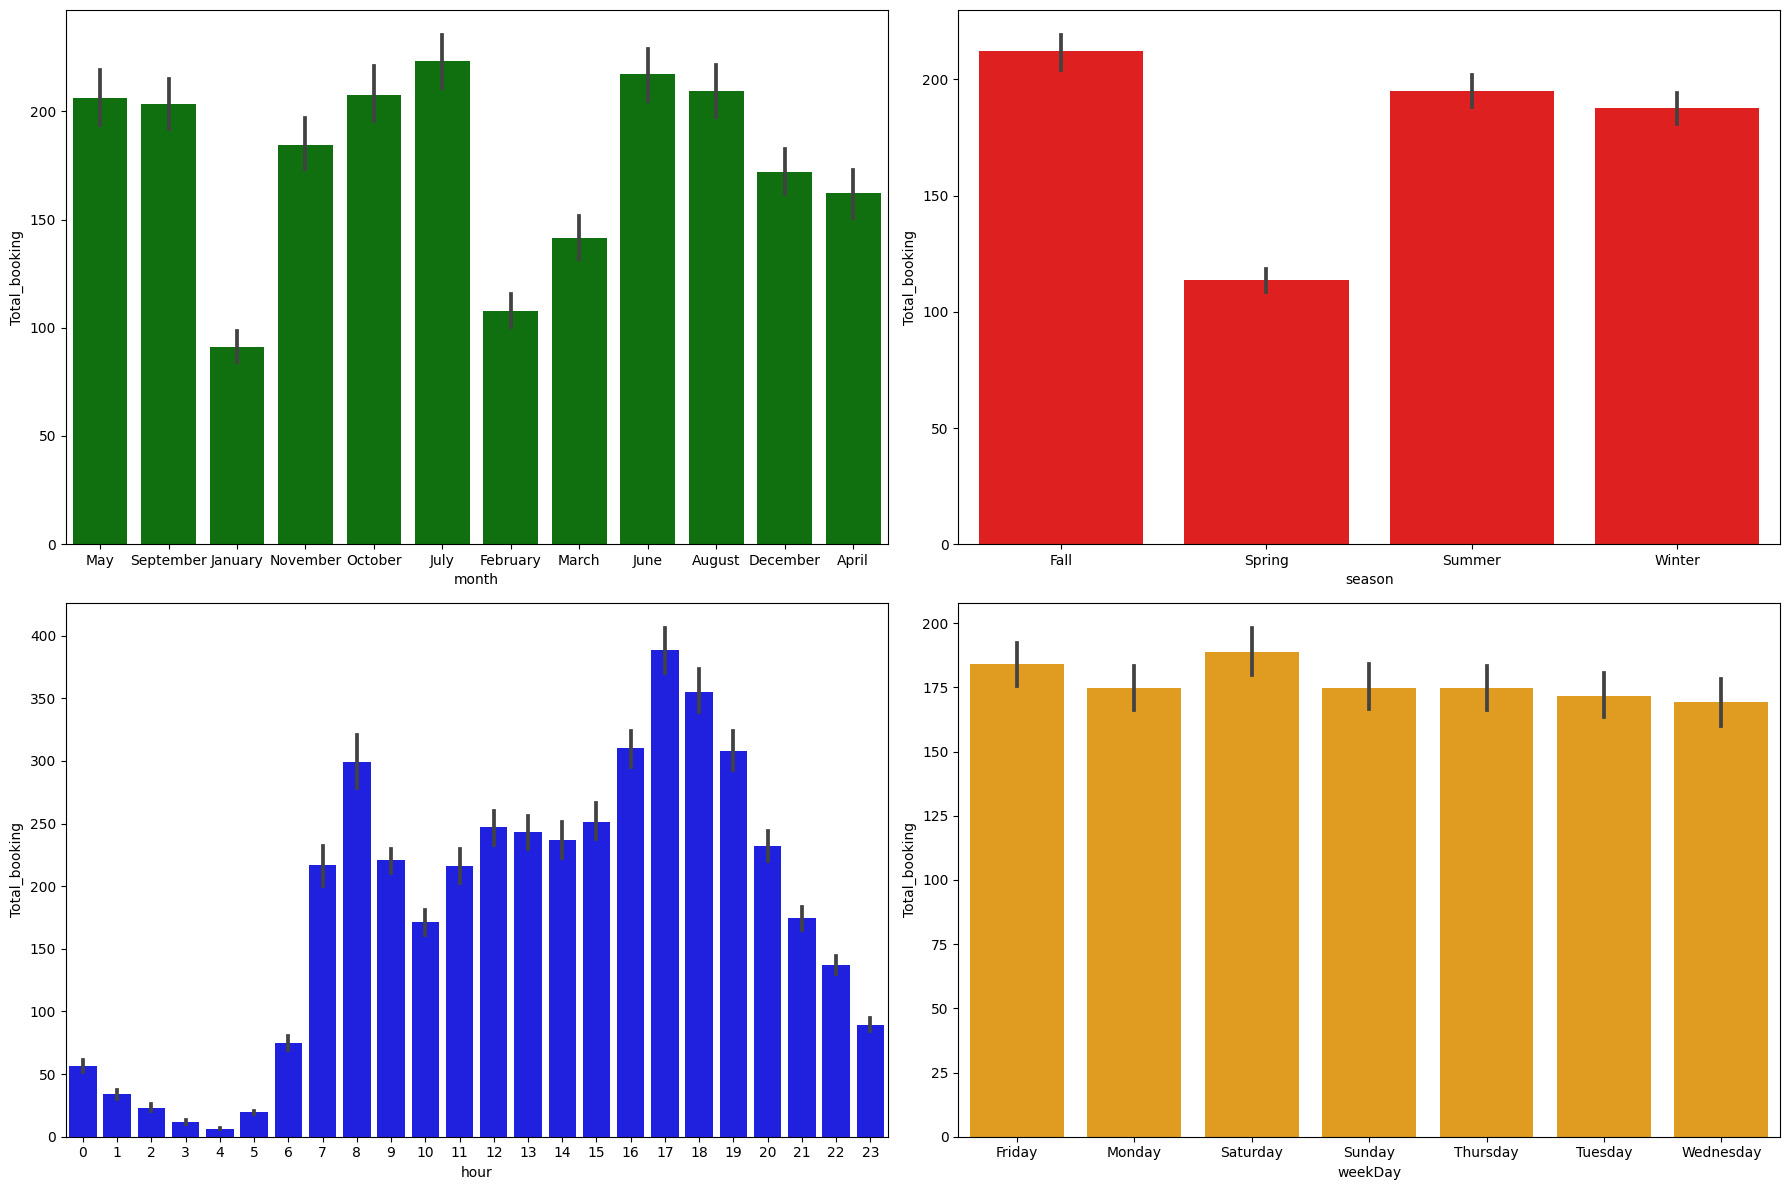

In [ ]:
plt.subplots(nrows= 2, ncols= 2, figsize=(18,12))

plt.subplot(2,2,1)
sns.barplot(x= 'month', y= 'Total_booking', data= data_train, color='green')

plt.subplot(2,2,2)
sns.barplot(x= 'season', y= 'Total_booking', data= data_train, color='red')

plt.subplot(2,2,3)
sns.barplot(x= 'hour', y='Total_booking', data=data_train, color='blue')

plt.subplot(2,2,4)
sns.barplot(x='weekDay', y='Total_booking', data=data_train, color='orange')

plt.tight_layout()
plt.show()

From the above charts we have got the below insights:
- The months of May, June, July, August, September, and October saw strong booking demand.
- Cab Booking demand is high in Fall season and low in Spring.
- Booking demand is high enough in afternoon and evening time, and customer willing to book cab after office hours.
- Demand tends to go up slightly during Fridays and Saturdays.

#**Use Histograms to plot all the continuous variables present in the data**

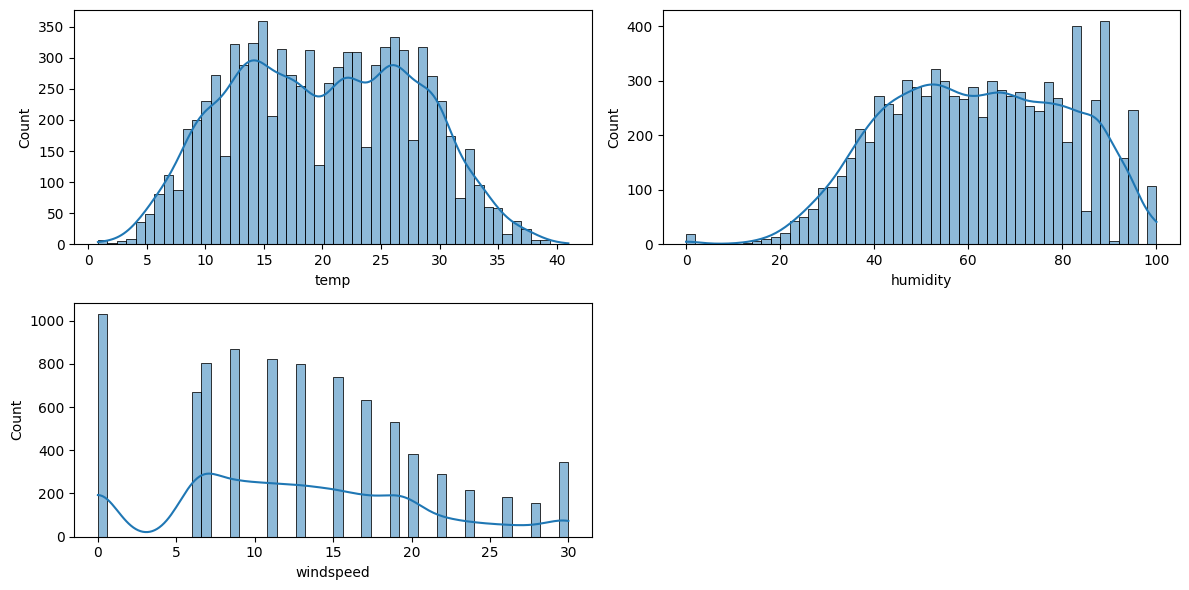

In [ ]:
plt.figure(figsize=[12,6])

plt.subplot(2,2,1)
sns.histplot(data_train['temp'], kde=True, bins=50)

plt.subplot(2,2,2)
sns.histplot(data_train['humidity'], kde=True, bins=50)

plt.subplot(2,2,3)
sns.histplot(data_train['windspeed'], kde=True, bins=50)

plt.tight_layout()
plt.show()

##- **Convert the categorical variables into one hot vector:**

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8466 entries, 0 to 8707
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         8466 non-null   category
 1   holiday        8466 non-null   category
 2   workingday     8466 non-null   category
 3   weather        8466 non-null   category
 4   temp           8466 non-null   float64 
 5   humidity       8466 non-null   int64   
 6   windspeed      8466 non-null   float64 
 7   Total_booking  8466 non-null   int64   
 8   date           8466 non-null   int64   
 9   hour           8466 non-null   int64   
 10  weekDay        8466 non-null   category
 11  month          8466 non-null   object  
 12  year           8466 non-null   int64   
dtypes: category(5), float64(2), int64(5), object(1)
memory usage: 637.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
data_train['weather'] = le.fit_transform(data_train['weather'])
data_train['season'] = le.fit_transform(data_train['season'])
data_train['weekDay'] = le.fit_transform(data_train['weekDay'])
data_train['month'] = le.fit_transform(data_train['month'])


In [ ]:
data_train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,Total_booking,date,hour,weekDay,month,year
0,2,0,1,0,22.14,77,16.9979,504,2,19,6,8,2012
1,0,0,1,0,28.70,79,19.0012,5,5,4,6,11,2012
2,1,0,1,0,5.74,50,22.0028,139,13,9,4,4,2011
3,3,0,1,0,13.94,29,8.9981,209,18,16,0,9,2011
4,0,0,1,0,30.34,51,19.0012,184,13,13,5,11,2011


In [ ]:
data_test['weather'] = le.fit_transform(data_test['weather'])
data_test['season'] = le.fit_transform(data_test['season'])
data_test['weekDay'] = le.fit_transform(data_test['weekDay'])
data_test['month'] = le.fit_transform(data_test['month'])

In [ ]:
data_test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,date,hour,weekDay,month,year
0,2,0,1,0,21.32,48,35.0008,10,11,4,8,2012
1,2,0,0,0,23.78,64,7.0015,9,7,2,6,2012
2,1,0,0,1,11.48,100,27.9993,6,20,3,7,2011
3,3,0,1,2,25.42,83,0.0000,13,11,4,10,2011
4,2,0,0,0,25.42,43,23.9994,2,12,2,6,2012


- The categorical values converted into encoded values using Label Encoding Techniques in both datasets.

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8466 entries, 0 to 8707
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         8466 non-null   int64   
 1   holiday        8466 non-null   category
 2   workingday     8466 non-null   category
 3   weather        8466 non-null   int64   
 4   temp           8466 non-null   float64 
 5   humidity       8466 non-null   int64   
 6   windspeed      8466 non-null   float64 
 7   Total_booking  8466 non-null   int64   
 8   date           8466 non-null   int64   
 9   hour           8466 non-null   int64   
 10  weekDay        8466 non-null   int64   
 11  month          8466 non-null   int64   
 12  year           8466 non-null   int64   
dtypes: category(2), float64(2), int64(9)
memory usage: 810.5 KB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      2178 non-null   int64   
 1   holiday     2178 non-null   category
 2   workingday  2178 non-null   category
 3   weather     2178 non-null   int64   
 4   temp        2178 non-null   float64 
 5   humidity    2178 non-null   int64   
 6   windspeed   2178 non-null   float64 
 7   date        2178 non-null   int64   
 8   hour        2178 non-null   int64   
 9   weekDay     2178 non-null   int64   
 10  month       2178 non-null   int64   
 11  year        2178 non-null   int64   
dtypes: category(2), float64(2), int64(8)
memory usage: 174.8 KB


In [ ]:
data= ['holiday', 'workingday']

data_train = pd.get_dummies(data_train, columns=data)

In [ ]:
data_test= pd.get_dummies(data_test, columns=data)

- Other categorical columns converted into encoded value using OneHot Encoding.

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8466 entries, 0 to 8707
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         8466 non-null   int64  
 1   weather        8466 non-null   int64  
 2   temp           8466 non-null   float64
 3   humidity       8466 non-null   int64  
 4   windspeed      8466 non-null   float64
 5   Total_booking  8466 non-null   int64  
 6   date           8466 non-null   int64  
 7   hour           8466 non-null   int64  
 8   weekDay        8466 non-null   int64  
 9   month          8466 non-null   int64  
 10  year           8466 non-null   int64  
 11  holiday_0      8466 non-null   uint8  
 12  holiday_1      8466 non-null   uint8  
 13  workingday_0   8466 non-null   uint8  
 14  workingday_1   8466 non-null   uint8  
dtypes: float64(2), int64(9), uint8(4)
memory usage: 826.8 KB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        2178 non-null   int64  
 1   weather       2178 non-null   int64  
 2   temp          2178 non-null   float64
 3   humidity      2178 non-null   int64  
 4   windspeed     2178 non-null   float64
 5   date          2178 non-null   int64  
 6   hour          2178 non-null   int64  
 7   weekDay       2178 non-null   int64  
 8   month         2178 non-null   int64  
 9   year          2178 non-null   int64  
 10  holiday_0     2178 non-null   uint8  
 11  holiday_1     2178 non-null   uint8  
 12  workingday_0  2178 non-null   uint8  
 13  workingday_1  2178 non-null   uint8  
dtypes: float64(2), int64(8), uint8(4)
memory usage: 178.8 KB


- Now we can see there is no categorical and object columns available in both datasets.

##**Split the dataset for training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
X= data_train.drop(['Total_booking'], axis= 1)
y= data_train['Total_booking']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.8, test_size=0.2, random_state=7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6772, 14)
(1694, 14)
(6772,)
(1694,)


#**Fit various models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbors Regressor)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

models = [
    ("Random Forest", RandomForestRegressor(random_state=7)),
    ("AdaBoost", AdaBoostRegressor(random_state=7)),
    ("Bagging", BaggingRegressor(random_state=7)),
    ("SVR", SVR()),
    ("K-Neighbors", KNeighborsRegressor())]

rmse_df = pd.DataFrame(columns=["Model", "RMSE"])

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = (mean_squared_error(y_test, y_pred, squared= False))
    rmse_df = rmse_df.append({"Model": name, "RMSE": rmse}, ignore_index=True)


<ipython-input-39-34d3401e8d4a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({"Model": name, "RMSE": rmse}, ignore_index=True)
<ipython-input-39-34d3401e8d4a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({"Model": name, "RMSE": rmse}, ignore_index=True)
<ipython-input-39-34d3401e8d4a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({"Model": name, "RMSE": rmse}, ignore_index=True)
<ipython-input-39-34d3401e8d4a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({"Model": name, "RMSE": rmse}, ignore_index=True)
<ipython-input-3

In [ ]:
rmse_df

,Model,RMSE
0,Random Forest,42.475562
1,AdaBoost,99.649762
2,Bagging,45.764481
3,SVR,162.741052
4,K-Neighbors,111.642675


- We can see that Random forest regressor model have a low RMSE value i.e. 42.27, which indicates that Random forest regressor is best model to implement.

<Figure size 2000x2000 with 0 Axes>

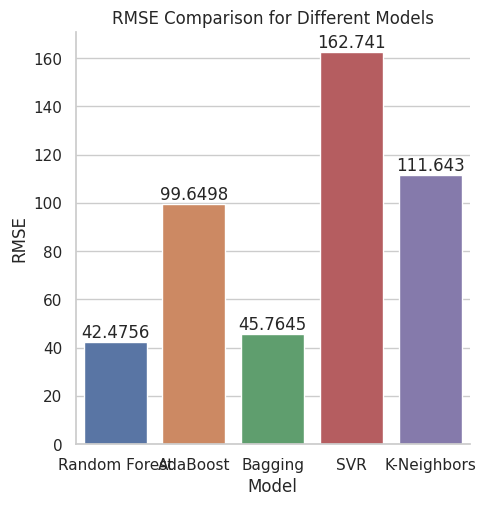

In [ ]:

sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))
cat_plot = sns.catplot(x='Model', y='RMSE', data=rmse_df, kind='bar')
for ax in cat_plot.axes.flat:
  ax.bar_label(ax.containers[0])
cat_plot.set(title='RMSE Comparison for Different Models')
plt.show()


- Graphical representation of RMSE values acheived from different models

#**Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_**

In [ ]:
import joblib

N_CORES = joblib.cpu_count(only_physical_cores=True)
print(f"Number of physical cores: {N_CORES}")

Number of physical cores: 1


In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(min_samples_leaf=5, random_state=7, n_jobs=N_CORES)

param_grid = {'n_estimators': [10, 20, 50, 100, 200]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score= grid_search.best_score_
print('Best Parameters:', best_params)
print('Best Score:', best_score)

Best Parameters: {'n_estimators': 200}
Best Score: 0.9000884315479905


#**Perform prediction on the test set and print the mean_squared_log_error**

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 45.54492102703098


In [ ]:
# Make predictions
y_test_pred = grid_search.predict(data_test)

In [ ]:
test_label = pd.read_csv('/content/test_label.csv')

In [ ]:
test_label.count

<bound method DataFrame.count of       Test
0      256
1       87
2       11
3       84
4      668
...    ...
2173     3
2174   144
2175   159
2176    29
2177   224

[2178 rows x 1 columns]>

In [ ]:
data_test.count()

season          2178
weather         2178
temp            2178
humidity        2178
windspeed       2178
date            2178
hour            2178
weekDay         2178
month           2178
year            2178
holiday_0       2178
holiday_1       2178
workingday_0    2178
workingday_1    2178
dtype: int64

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

msle = mean_squared_log_error(test_label, y_test_pred)

print("Mean Squared Logarithmic Error:", msle)

Mean Squared Logarithmic Error: 0.14799954317781194


- Mean Squared Logarithmic Error of Random Forest Regressor is: 0.14799954317781194

- As Random Forest Regresor resulted with very less Mean Squared Logarithmic Error would shows Random Forest Regresor as my best model with parameters {'n_estimators': 200}

In [ ]:
result= pd.DataFrame(y_test_pred)

In [ ]:
result.head(10)

,0
0,227.042295
1,71.236826
2,44.725232
3,121.810677
4,514.871290
5,41.349570
6,273.774471
7,481.990102
8,380.534216
9,4.318642


In [ ]:
test_label.head(10)

,Test
0,256
1,87
2,11
3,84
4,668
5,53
6,237
7,678
8,520
9,5
